Hari Kosuru, hk8663
Atreya Misra, am73676

In [36]:
import numpy as np
import pandas as pd
import sklearn
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import scipy.linalg as LA
import matplotlib
import matplotlib.image as mpimg
from PIL import Image
from scipy.misc import imread
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, LassoCV, Lasso
from sklearn.model_selection import cross_val_score

import xgboost as xgb

Problem 1: Linear Discriminant Analysis
    Part 1:

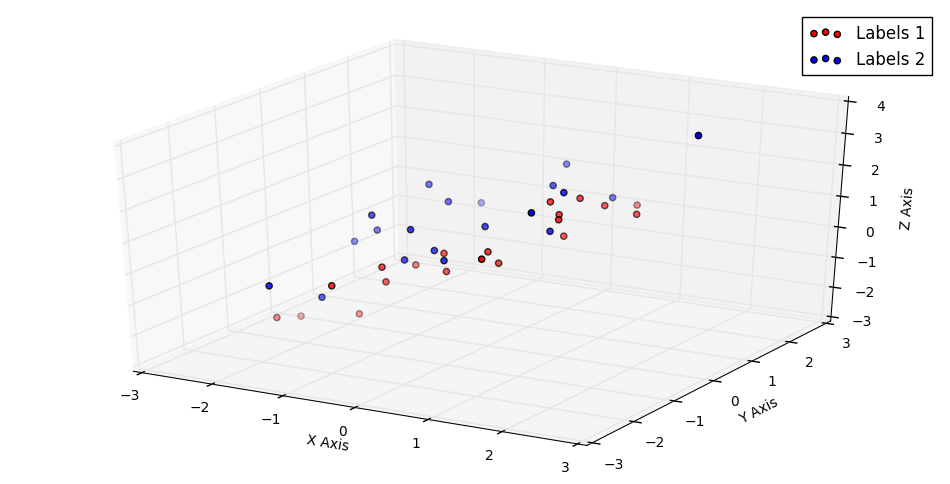

In [28]:
mean1 = [0, 0, 0]
cov1 = [[1, 0.9, 0.9], [0.9, 1, 0.9], [0.9, 0.9, 1]]
label1 = np.random.multivariate_normal(mean1, cov1, 20)

mean2 = [0, 0, 1]
cov2 = [[1, 0.8, 0.8], [0.8, 1, 0.8], [0.8, 0.8, 1]]
label2 = np.random.multivariate_normal(mean2, cov2, 20)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(label1.T[0], label1.T[1], label1.T[2], c='r', label='Labels 1')
ax.scatter(label2.T[0], label2.T[1], label2.T[2], c='b', label= 'Labels 2')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.legend()
plt.show()

Just experimenting projection onto Z axis

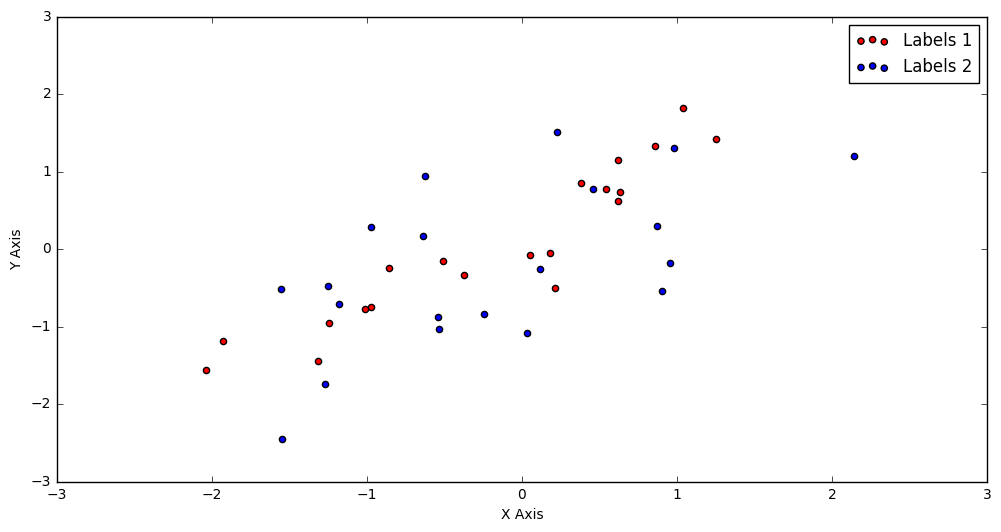

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(label1.T[0], label1.T[1], c='r', label='Labels 1')
ax.scatter(label2.T[0], label2.T[1], c='b', label= 'Labels 2')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

plt.legend()
plt.show()

Linear Discriminant Analysis

[[ 39.41524  30.07124  32.68555]
 [ 30.07124  40.39048  31.92878]
 [ 32.68555  31.92878  39.59739]]
vector of max weights [-0.05402 -0.04135  0.10319]


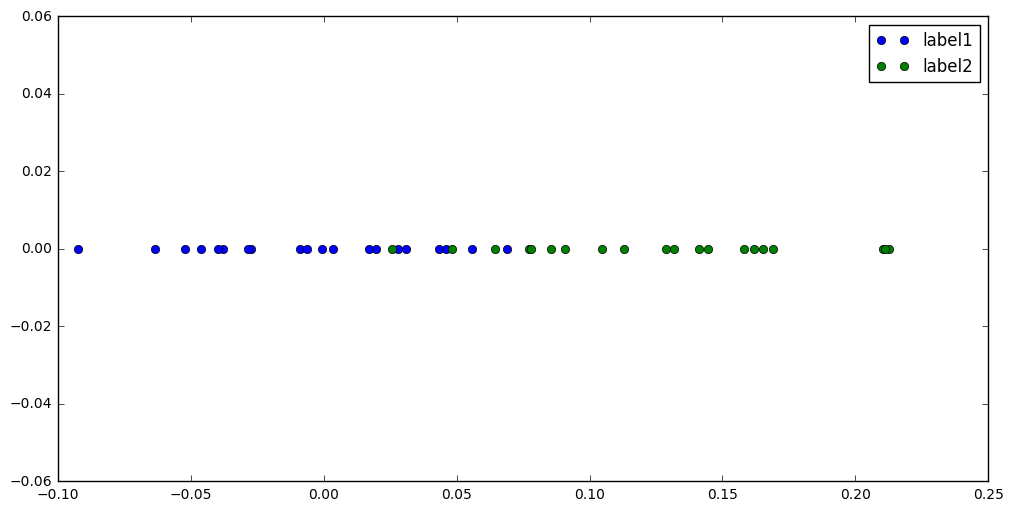

In [30]:
#calculate variance within class
Sw = np.dot((label1-mean1).T, (label1-mean1)) + np.dot((label2-mean2).T, (label2-mean2))

print Sw

#calculate weights which maximize linear separation
w = np.dot(np.linalg.inv(Sw), (np.subtract(mean2,mean1)))

print "vector of max weights", w
#projection of classes on 1D space
plt.plot(np.dot(label1, w), [0]*len(label1), "bo", label="label1")
plt.plot(np.dot(label2, w), [0]*len(label2), "go", label="label2")
plt.legend()

plt.show()

Part 3

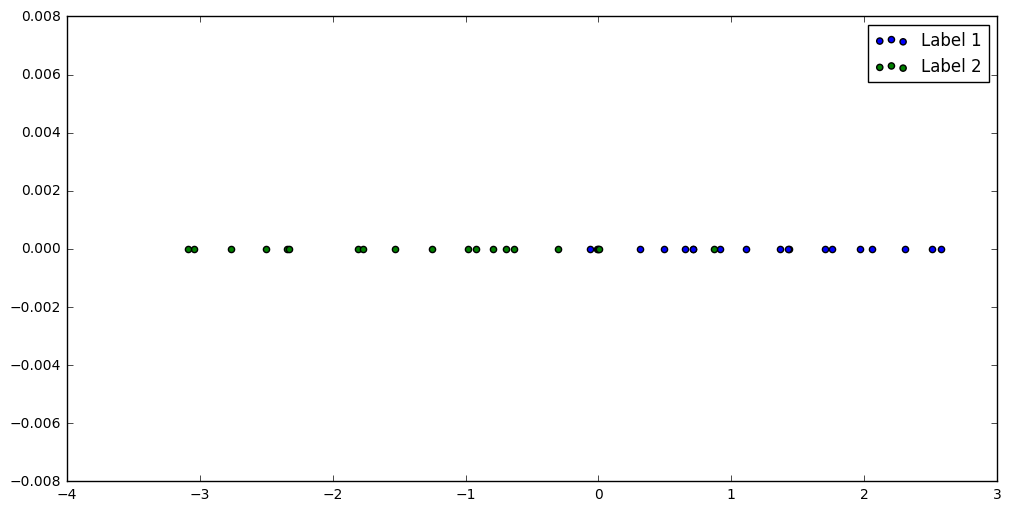

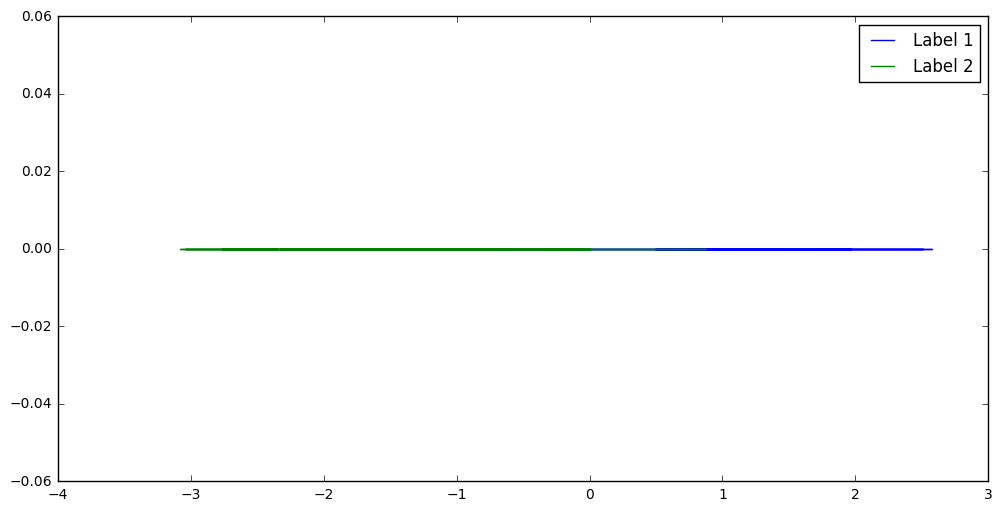

In [47]:
X = np.concatenate((label1, label2), axis=0)

clf = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
labels = np.vstack((np.ones((20, 1)), np.zeros((20, 1))))
result = clf.fit_transform(X, labels.reshape(40))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(result[0:19], [0] * len(result[0:19]),  c='b', label='Label 1')
ax.scatter(result[20:39], [0] * len(result[20:39]), c='g', label='Label 2')
plt.legend()
plt.show()

plt.plot(result[0:19], len(result[0:19]) * [0],  c='b', label='Label 1')
plt.plot(result[20:39], len(result[20:39]) * [0], c='g', label='Label 2')
plt.legend()

plt.show()

Note that LDA through SKLearn is similar to the manual LDA computation

Problem 2:

Our approach uses Spectrl Value Decomposition to approximate the given file iteratively, computing the differences from the original and the approximations (at a particular rank). If the differences/errors are less than the threshhold, then we can consider those elements as corrupt entries, and approach a better approximation.

In [ ]:
thresh = 100;
numIterations = 5;

# Perform SVD Decomposition and return an approximate matrix of required rank
def getMatrix(data,n):
    P,D,Q=np.linalg.svd(data, full_matrices=False)
    stackedDiag = np.hstack((D[:n],np.zeros(len(D)-n)))
    diagMat = np.diag(stackedDiag)
    return np.dot(np.dot(P, diagMat), Q)


# Calculate list of incorrect values based on comparison with threshhold
def printWrongValues(diffMatrix):
    retList=[]
    for y in range(0,diffMatrix.shape[0]):
        for x in range(0,diffMatrix.shape[1]):
            if diffMatrix[y][x] >= thresh:
                retList.append((x,y))
    print retList
    
# Display Matrix with the differenes found    
def getErrors(data,k,plot=True):
    errors=np.absolute(data-np.round(getMatrix(data,k)))
    if(plot):
        plt.imshow(errors)
        plt.show()
    return errors

# Compute Differences and print the elements that are corrupt in a given file
def process(file,numRanks=9):
    data = np.genfromtxt(file, delimiter=',',)
    for x in range(0,numIterations,1):
        print("Rank: "+ str(x))
        getRankDifference(data,x)
    printWrongValues(getErrors(data,numRanks,False))
    
#process("CorrMat1.csv", numRanks=5)
process("CorrMat3.csv", numRanks=5)    

Problem 3:

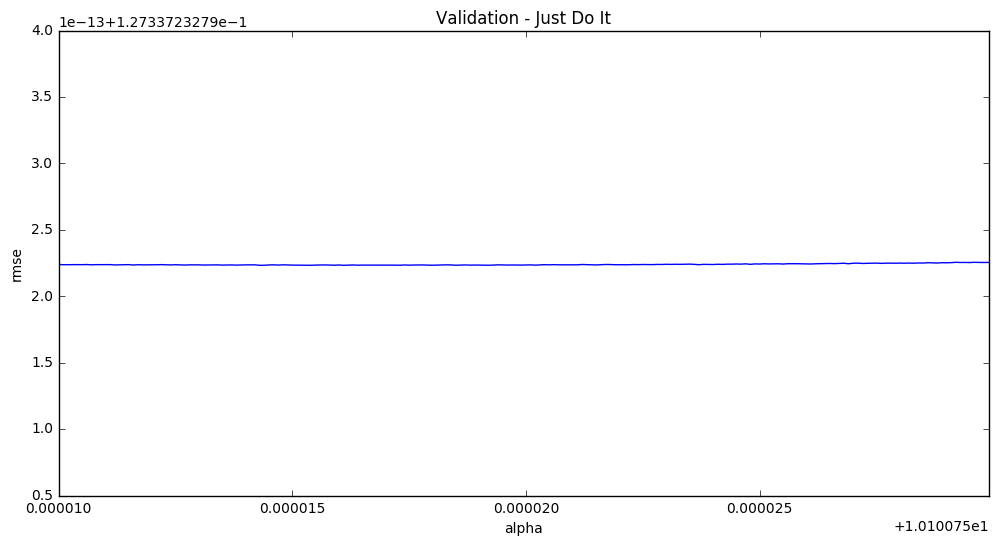

0.127337232791


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:91: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


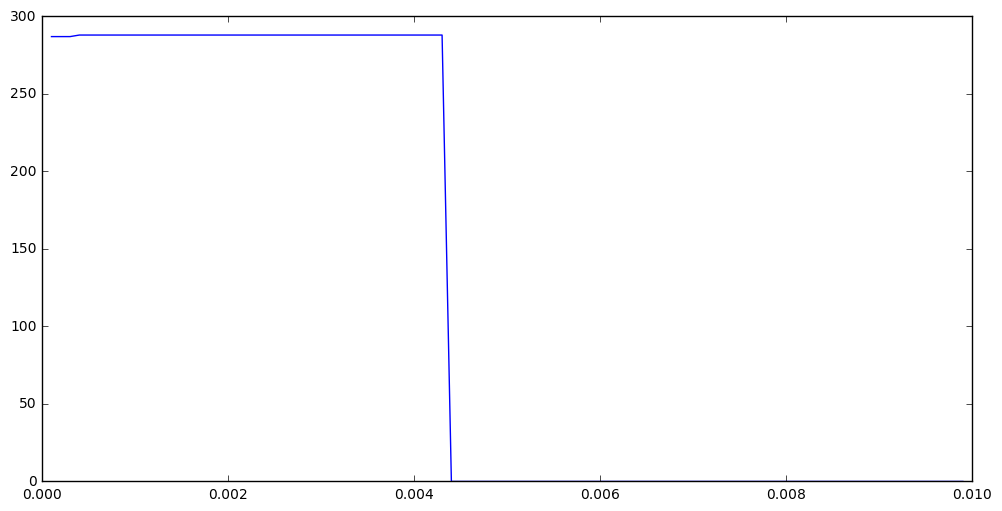

best lasso alpha is:
0.00052606


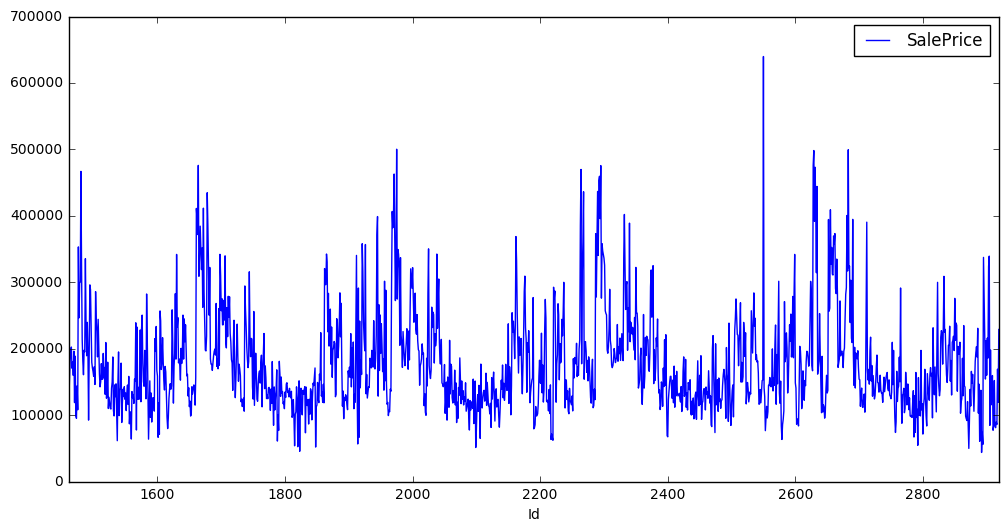

lasso mean:
0.12314421091
lasso min:
0.103309729051
[ 0.10331  0.13147  0.12552  0.10819  0.14722]
real lasso mean:
0.12314421091
real lasso min:
0.103309729051


In [37]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
#prices.hist()
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
                               
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)

#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

#creating a runner for alpha values
def ridgeRegTest(a):
    clf = Ridge(alpha=a)
    clf.fit(X_train, y)
    predict = np.expm1(clf.predict(X_test))

    results = pd.DataFrame({"Id":test.Id, "SalePrice":predict})
    results.to_csv("RidgeResults.csv", index = False)

    results.plot(x='Id', y='SalePrice', kind='line')
    plt.show()
#ridgeRegTest(10.10077)
def lassoTest(a):
    clf = Lasso(alpha=a)
    clf.fit(X_train, y)
    predict = np.expm1(clf.predict(X_test))

    results = pd.DataFrame({"Id":test.Id, "SalePrice":predict})
    results.to_csv("LassoResults.csv", index = False)

    results.plot(x='Id', y='SalePrice', kind='line')
    plt.show()

#checkeing rmse on different values of alpha
alphas = []
for i in range(0,200):
    alphas.append(i*.0000001+10.10076)
    
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
model_ridge = Ridge()

#alphas = [.001, .01, .05, .1, .5, 1, 5, 10, 50]
#first try small range then determine min from graph in order to save running time

cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

print cv_ridge.min()

alphas2 = []
zeronorm = []

def lnorm(mini, maxi, increment):
    for i in range(mini,maxi):
        alphas2.append(i*increment)
        alphas3 = i*increment
        #print type(alphas3)
        model_lasso = Lasso(alpha = alphas3).fit(X_train, y)
        coefficients = model_lasso.coef_
        nonzeros = 0;
        for hey in coefficients:
            if (coefficients[hey] != 0.0):
                nonzeros+=1
        zeronorm.append(nonzeros)
    #print zeronorm
    plt.plot(alphas2, zeronorm)
    plt.show()
                
lnorm(1,100,.0001)        
#model_lasso = LassoCV()

#cv_lasso = [rmse_cv(LassoCV(alphas = alpha)).mean()
#            for alpha in alphas2]
#
#cv_lasso = pd.Series(cv_lasso, index = alphas2)
#cv_lasso.plot(title = "Validation - Just Do It2")
#plt.xlabel("alpha")
#plt.ylabel("rmse")
#plt.show()
def findBestLasso(mini,maxi,increment):
    bestAlpha = 0
    currentMin = 1
    for i in range(mini,maxi):
        alphaTest = i*increment
        model_lasso_test = Lasso(alpha = alphaTest).fit(X_train, y)
        score=rmse_cv(model_lasso_test).mean()
        #print score
        #print currentMin
        if(score < currentMin):
            bestAlpha=alphaTest
            currentMin=score
    return bestAlpha
bestone = findBestLasso(52550,52650,.00000001)
print 'best lasso alpha is:'
print bestone

lassoTest(bestone)


#print alphas2
print 'lasso mean:'
print rmse_cv(model_lasso).mean()
print 'lasso min:'
print rmse_cv(model_lasso).min()


model_lasso = LassoCV(alphas = [1, 0.5, 0.1, 0.001, 0.0005]).fit(X_train, y)
print rmse_cv(model_lasso)
print 'real lasso mean:'
print rmse_cv(model_lasso).mean()
print 'real lasso min:'
print rmse_cv(model_lasso).min()

Incorporating XGBoost (Part 5 onwards)

In [ ]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()
plt.show()

In [ ]:
model_xgb = xgb.XGBRegressor(n_estimators=350, max_depth=3, learning_rate=0.2)
model_xgb.fit(X_train, y)

xgb_preds = np.expm1(model_xgb.predict(X_test))

results = pd.DataFrame({"Id":test.Id, "SalePrice":xgb_preds})
results.to_csv("XGBresults.csv", index = False)

results.plot(x='Id', y='SalePrice', kind='line')
plt.show()

After experimenting with other parameters of XGBRegressor, namely max_depth, learning_rate, and n_estimators, these were the values that resulted with the best Kaggle submission score. The other submissions ranked from .136 to .15, and the Ensemble apprach with Ridge and Lasso CV's were more successful.

Initial XGBoost Submission resulted with .13427 (which is worse than the previous Ridge with CV)